## 第4章: Position-Bias-Effects
P232

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch.optim import Adam
from pytorchltr.datasets import MSLR30K

from model import MLPScoreFunc
from train import train_ranker

In [2]:
# 実験設定
batch_size = 32
hidden_layer_sizes = (10,10)
learning_rate = 0.0001
n_epochs = 100

In [3]:
# MSLR30Kデータセットを読み込む（初回だけ時間がかかる）
train = MSLR30K(split="train")
test = MSLR30K(split="test")

## pow_true=0.0のデータに対して、IPS推定量に基づくMLPRankerの学習（バイアス無）

In [4]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_no_bias = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=0.0,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:04<00:00,  4.25s/it]


## pow_true=0.5のデータに対して、IPS推定量に基づくMLPRankerの学習（バイアス小）

In [5]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_small_bias = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=0.5,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:06<00:00,  4.86s/it]


## pow_true=1.0のデータに対して、IPS推定量に基づくMLPRankerの学習（バイアス中）

In [6]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_medium_bias = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.0,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:22<00:00,  4.42s/it]


## pow_true=1.5のデータに対して、IPS推定量に基づくMLPRankerの学習（バイアス大）

In [ ]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_large_bias = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.5,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:23<00:00,  4.44s/it]


## 学習曲線の描画（図4.16）

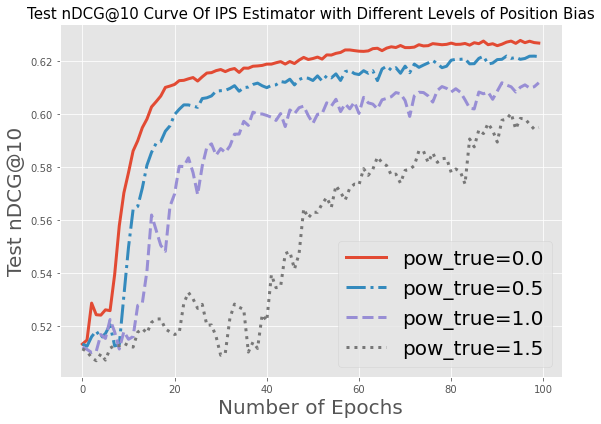

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.plot(range(n_epochs), ndcg_score_list_no_bias, label="pow_true=0.0", linewidth=3)
plt.plot(range(n_epochs), ndcg_score_list_small_bias, label="pow_true=0.5", linewidth=3, linestyle="dashdot")
plt.plot(range(n_epochs), ndcg_score_list_medium_bias, label="pow_true=1.0", linewidth=3, linestyle="dashed")
plt.plot(range(n_epochs), ndcg_score_list_large_bias, label="pow_true=1.5", linewidth=3, linestyle="dotted")
   
plt.title(f"Test nDCG@10 Curve Of IPS Estimator with Different Levels of Position Bias", fontdict=dict(size=15))
plt.xlabel("Number of Epochs", fontdict=dict(size=20))
plt.ylabel("Test nDCG@10", fontdict=dict(size=20))
plt.tight_layout()
plt.legend(loc="best", fontsize=20)
plt.show()